In [1]:
import torch, h5py
import matplotlib.pyplot as plt

from qml_ssl.data import load_mnist_img, create_data_loader, visualize_mnist
from qml_ssl.data import load_pe_img, inspect_h5py_file, visualize_pe
from qml_ssl.data import load_qg_img, visualize_qg, visualize_qg_diff


## MNIST Dataset

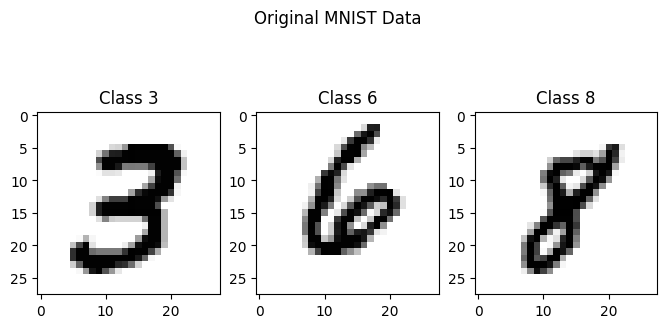

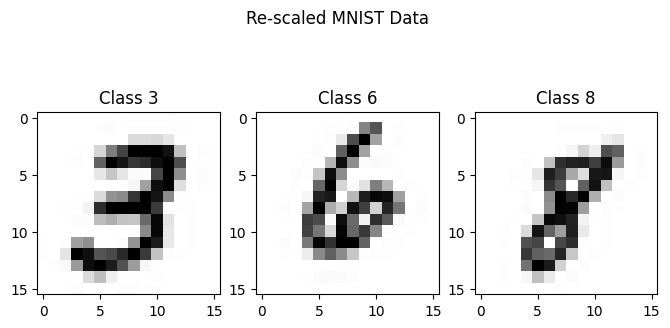

In [2]:
classes = (3, 6, 8)
reduced_dim = 16
dataset_size = (1000, 300)

# Load and preprocess the MNIST data
mnist_data_original = load_mnist_img(classes=classes, dataset_size=dataset_size)
mnist_data_resized = load_mnist_img(classes=classes, reduced_dim=reduced_dim, dataset_size=dataset_size)

# Visualize the preprocessed images
visualize_mnist(mnist_data_original["train_data"], mnist_data_original["train_labels"], classes, title="Original MNIST Data")
visualize_mnist(mnist_data_resized["train_data"], mnist_data_resized["train_labels"], classes, title="Re-scaled MNIST Data")

## Quark-Gluon Images Dataset

In [6]:
f_train = h5py.File("../../data/QG_Images/quark-gluon_train-set_n793900.hdf5","r")
f_test_1 = h5py.File("../../data/QG_Images/quark-gluon_test-set_n10000.hdf5","r")
f_test_2 = h5py.File("../../data/QG_Images/quark-gluon_test-set_n139306.hdf5","r")
f_n794k = h5py.File("../../data/QG_Images/quark-gluon_train-set_n793900.hdf5","r")
f_n140k = h5py.File("../../data/QG_Images/quark-gluon_test-set_n139306.hdf5","r")
f_n10k = h5py.File("../../data/QG_Images/quark-gluon_test-set_n10000.hdf5","r")

print(f_train.keys())
print(f_test_1.keys())
print(f_test_2.keys())

x_n794k = f_n794k.get("X_jets")
y_n794k = f_n794k.get("y")

x_n140k = f_n140k.get("X")
y_n140k = f_n140k.get("y")

x_n10k = f_n10k.get("X_jets")
y_n10k = f_n10k.get("y")

print("Dataset Size: ", x_n794k.shape, x_n140k.shape, len(x_n10k.shape))

<KeysViewHDF5 ['X_jets', 'm0', 'pt', 'y']>
<KeysViewHDF5 ['X', 'y']>
<KeysViewHDF5 ['X_jets', 'm0', 'pt', 'y']>
Dataset Size:  793900 10000 139306


#### Visualize single sample from each class

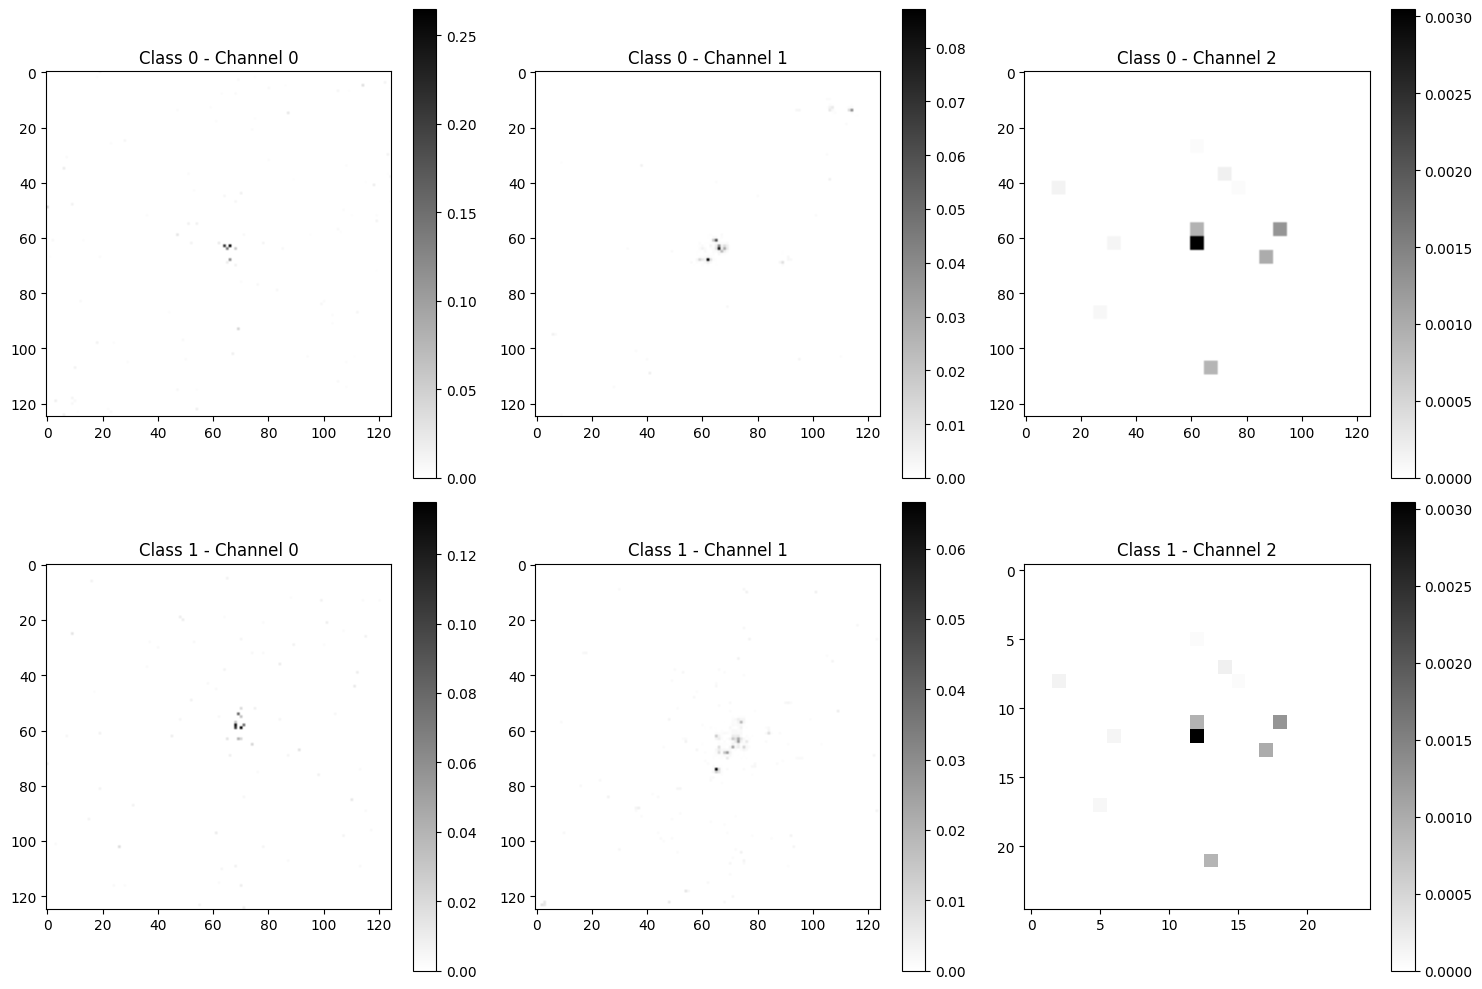

In [8]:
visualize_qg(x_n140k[:10000], y_n140k[:10000], num=1, use_lognorm=False)

#### Visualize overall distribution of each class

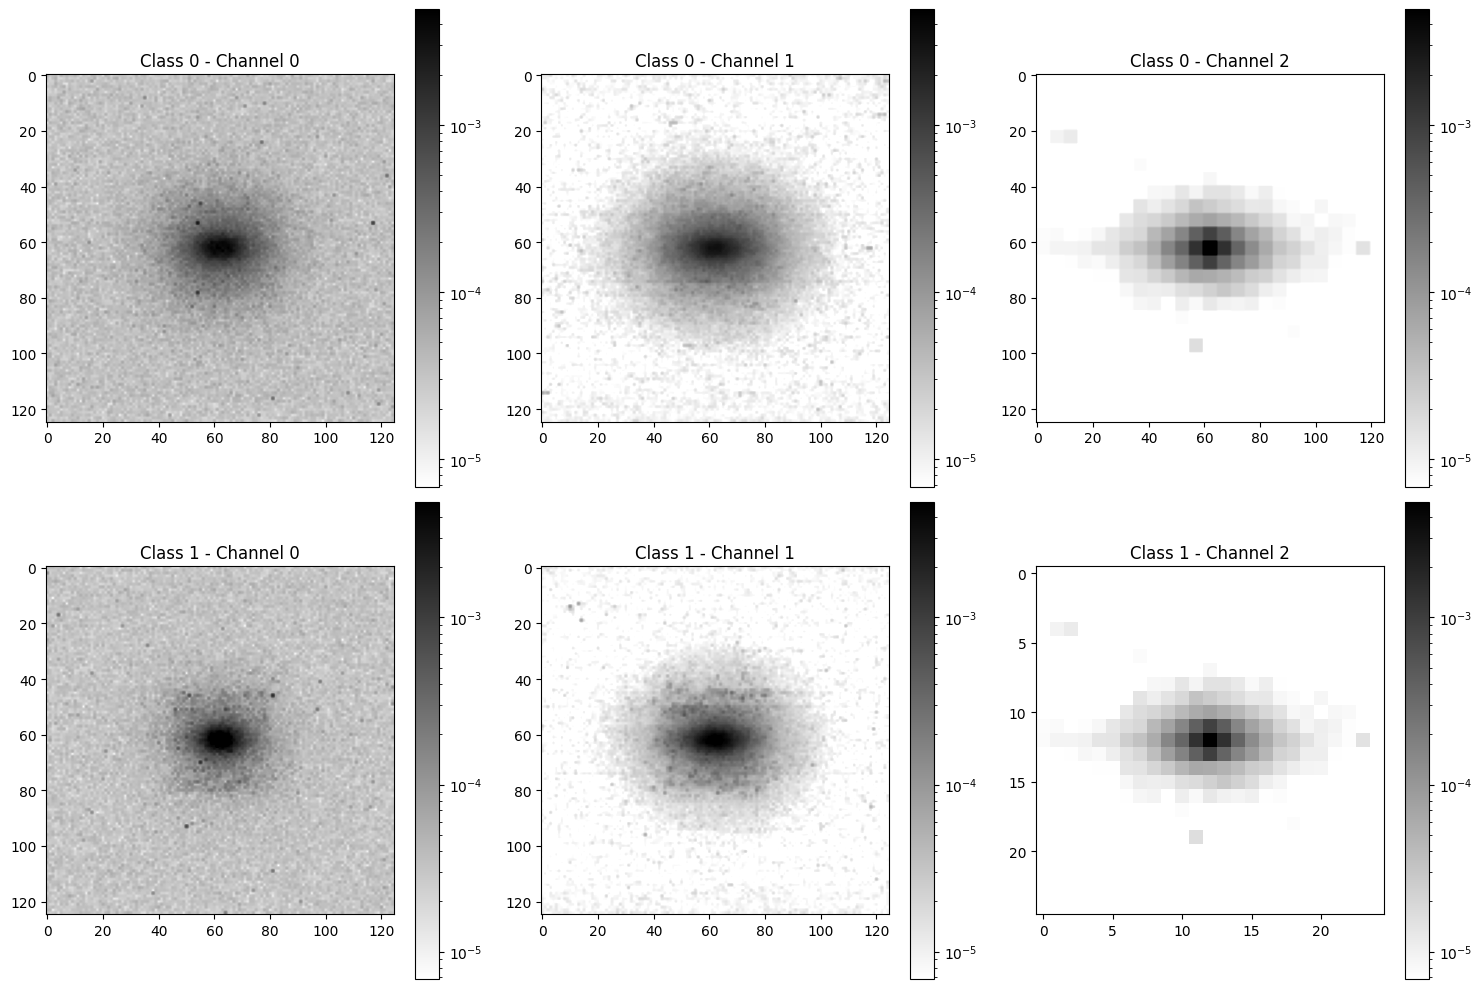

In [7]:
visualize_qg(x_n140k[:10000], y_n140k[:10000], use_lognorm=True)

#### Visualize distribution of relative difference between two classes

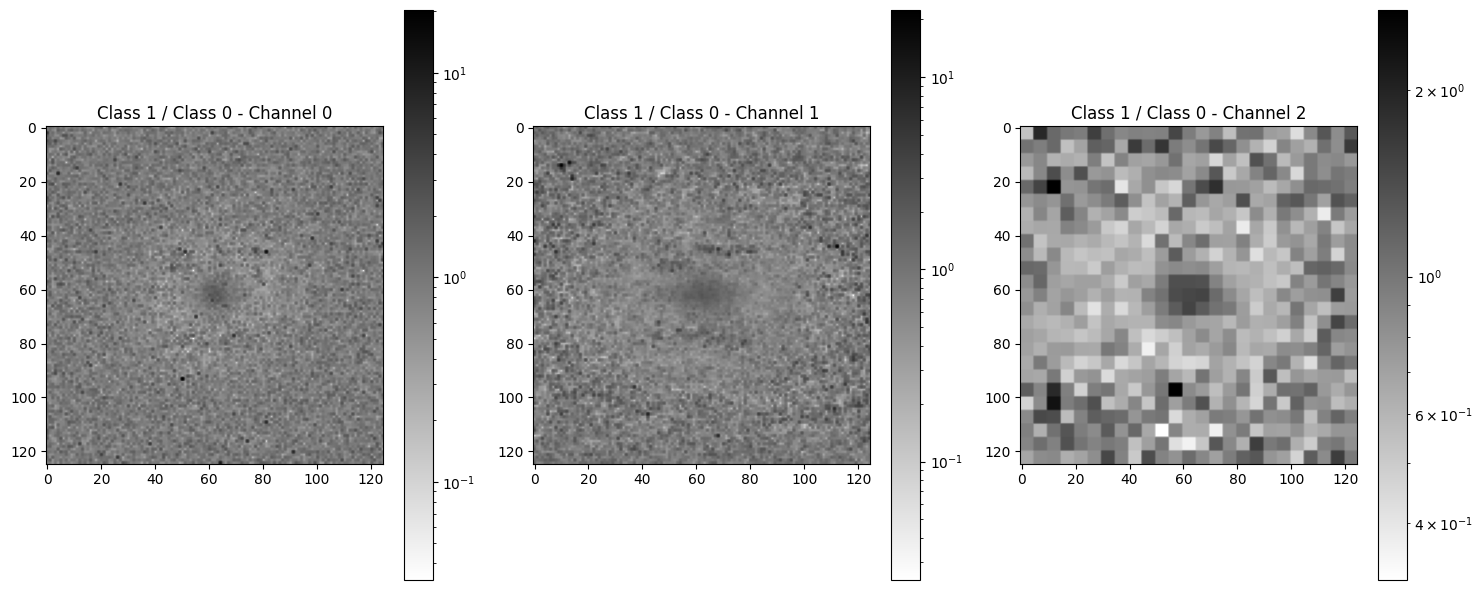

In [9]:
visualize_qg_diff(x_n140k[:10000], y_n140k[:10000])

## Photon-Electron Images Dataset

In [3]:
electron_file = "../../data/PhotonElectron/electron.hdf5"
photon_file = "../../data/PhotonElectron/photon.hdf5"

inspect_h5py_file(electron_file)
inspect_h5py_file(photon_file)

Inspecting HDF5 file: ../../data/PhotonElectron/electron.hdf5
Name: X
    Shape: (249000, 32, 32, 2)
    Dtype: float32
Name: y
    Shape: (249000,)
    Dtype: float32
Inspecting HDF5 file: ../../data/PhotonElectron/photon.hdf5
Name: X
    Shape: (249000, 32, 32, 2)
    Dtype: float32
Name: y
    Shape: (249000,)
    Dtype: float32


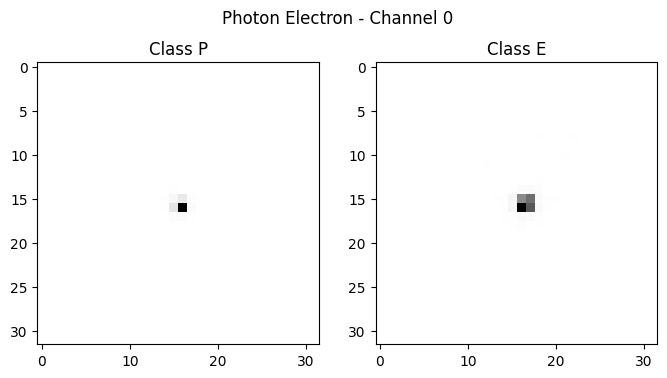

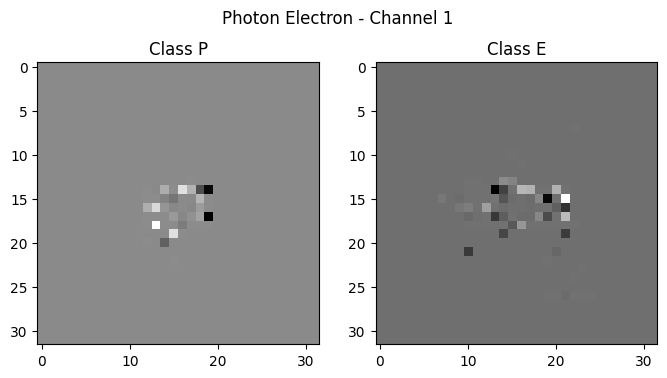

In [4]:
# Visualize original images
particle_data = load_pe_img(electron_file, photon_file, dataset_size=10, channel=0)

train_data = particle_data["train_dataset"].data
train_labels = particle_data["train_dataset"].labels
visualize_pe(train_data, train_labels, title=f"Photon Electron - Channel {0}")

particle_data = load_pe_img(electron_file, photon_file, dataset_size=10, channel=1)

train_data = particle_data["train_dataset"].data
train_labels = particle_data["train_dataset"].labels
visualize_pe(train_data, train_labels, title=f"Photon Electron - Channel {1}")

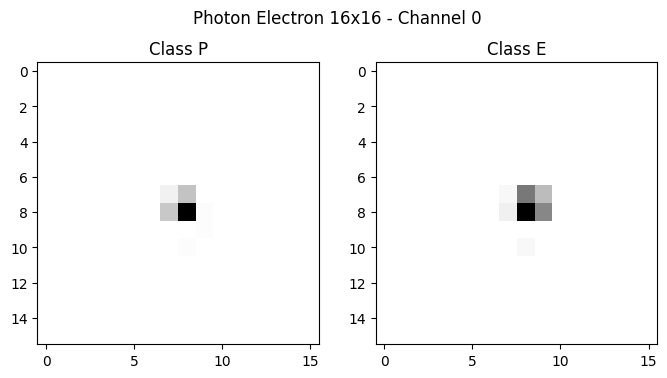

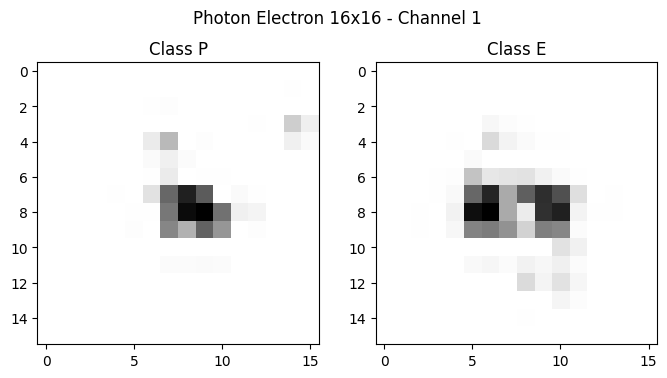

In [5]:
# Visualize the preprocessed images
reduced_dim = 16

particle_data = load_pe_img(electron_file, photon_file, reduced_dim=reduced_dim, channel=0)

train_data = particle_data["train_dataset"].data
train_labels = particle_data["train_dataset"].labels
visualize_pe(train_data, train_labels, title=f"Photon Electron 16x16 - Channel {0}")

particle_data = load_pe_img(electron_file, photon_file, reduced_dim=reduced_dim, channel=1)

train_data = particle_data["train_dataset"].data
train_labels = particle_data["train_dataset"].labels
visualize_pe(train_data, train_labels, title=f"Photon Electron 16x16 - Channel {1}")